In [ ]:
when we use OLS and gradient descent


In [26]:
Gradient descent:

define the equation:

y = mx +b

select/define the cost function:
![Screenshot 2024-09-05 at 10.02.17 AM.png](attachment:c463c93f-6a8d-4101-95c6-c33663912de2.png)

Compute the gradient:

![Screenshot 2024-09-05 at 10.03.25 AM.png](attachment:5b45e799-568c-47ab-b964-20a0045ecfe1.png)

Update the parameters:

![Screenshot 2024-09-05 at 10.03.57 AM.png](attachment:565a97ac-3e07-419d-a103-6071ce6beea6.png)

When to stop??
 1000 steps
 if the change in the error is very low typically < 0.0001

SyntaxError: invalid syntax (1765246782.py, line 1)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [36]:
# Generate a dataset using sklearn's make_regression function
# X is a 2D array (features), y is the target values
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.flatten()  # Flatten X for easier computation (since we are dealing with one feature)

In [38]:
# Step 1: Fit using OLS (Ordinary Least Squares) with sklearn's LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)  # Reshape X to fit the model
m_ols = model.coef_[0]  # Slope (m)
b_ols = model.intercept_  # Intercept (b)

# Print OLS results
print(f"OLS Slope (m): {m_ols}")
print(f"OLS Intercept (b): {b_ols}")

OLS Slope (m): 44.43716999225497
OLS Intercept (b): 1.1651153205269718


In [ ]:
y =  44.43716999225497 * x + 1.1651153205269718

In [46]:
cost_history = np.zeros(iterations)

In [52]:
len(cost_history)

1000

In [66]:
import pandas as pd

In [68]:
# import seaborn as sns
# sns.scatterplot(data = pd.DataFrame([X,y]),x = X,y = y)

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 2 and the vector passed to `x` has length 100.

In [126]:
# Step 2: Implement gradient descent
def compute_cost(X, y, m, b):
    n = len(y)
    predictions = m * X + b
    # over her the cost function is MSE
    cost = (1/n) * np.sum((y - predictions) ** 2)
    return cost

def gradient_descent(X, y, m, b, learning_rate, iterations):
    n = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = m * X + b
        m_gradient = -(2/n) * np.sum(X * (y - predictions))
        b_gradient = -(2/n) * np.sum(y - predictions)

        print ("m value",m,"b value",b,"m gradient:",m_gradient , "b gradient",b_gradient,"alpha * m_gradient:",learning_rate * m_gradient , "alpha * gradient", learning_rate * b_gradient)
        # Update the parameters
        m = m - (learning_rate * m_gradient)
        b = b - (learning_rate * b_gradient)

        # sns.scatter(X,y,)
        # Save the cost at each iteration
        cost_history[i] = compute_cost(X, y, m, b)
        
    return m, b, cost_history

def gradient_descent_with_stop(X, y, m, b, learning_rate, iterations):
    n = len(y)
    cost_history = np.zeros(iterations)
    i=0
    while(1):
        predictions = m * X + b
        m_gradient = -(2/n) * np.sum(X * (y - predictions))
        b_gradient = -(2/n) * np.sum(y - predictions)

        print ("epochs",i,"cost",compute_cost(X, y, m, b),"m value",m,"b value",b,"m gradient:",m_gradient , "b gradient",b_gradient,"alpha * m_gradient:",learning_rate * m_gradient , "alpha * gradient", learning_rate * b_gradient)
        # Update the parameters
        m = m - (learning_rate * m_gradient)
        b = b - (learning_rate * b_gradient)

        # sns.scatter(X,y,)
        # Save the cost at each iteration
        cost_history[i] = compute_cost(X, y, m, b)
        if i > 1:
            print (cost_history[i],cost_history[i-1],cost_history[i] - cost_history[i-1])
            if abs(abs(cost_history[i]) - abs(cost_history[i - 1])) < 0.0001:
                break;
        i = i + 1
        
    return m, b, cost_history



epochs 0 cost 1702.3089206475524 m value 0 b value 0 m gradient: -73.28431449581686 b gradient 6.899060052036078 alpha * m_gradient: -0.7328431449581686 alpha * gradient 0.06899060052036078
epochs 1 cost 1648.5866157083965 m value 0.7328431449581686 b value -0.06899060052036078 m gradient: -72.05741413613802 b gradient 6.608872434195273 alpha * m_gradient: -0.7205741413613802 alpha * gradient 0.06608872434195273
epochs 2 cost 1596.6709527231703 m value 1.453417286319549 b value -0.1350793248623135 m gradient: -70.8514169237195 b gradient 6.327036755302132 alpha * m_gradient: -0.708514169237195 alpha * gradient 0.06327036755302132
1546.5000209863742 1596.6709527231703 -50.17093173679609
epochs 3 cost 1546.5000209863742 m value 2.161931455556744 b value -0.19834969241533482 m gradient: -69.66595964606002 b gradient 6.053342562196783 alpha * m_gradient: -0.6966595964606002 alpha * gradient 0.06053342562196783
1498.0140754126967 1546.5000209863742 -48.485945573677554
epochs 4 cost 1498.014

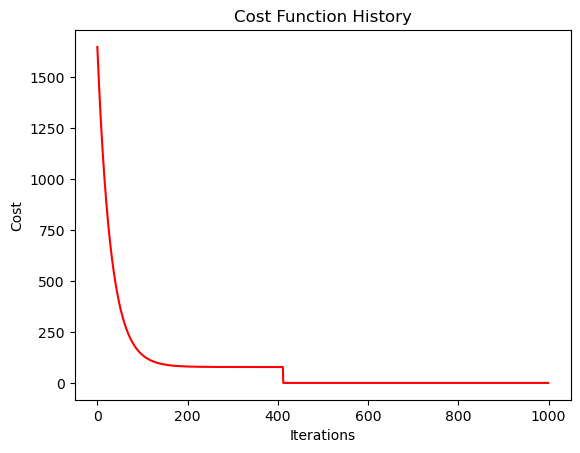

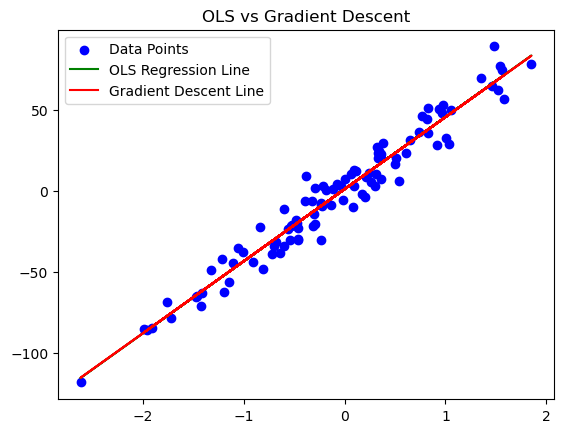

In [128]:
# Initial parameters for gradient descent
m_initial = 0
b_initial = 0
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
# m_gd, b_gd, cost_history = gradient_descent(X, y, m_initial, b_initial, learning_rate, iterations)
m_gd, b_gd, cost_history = gradient_descent_with_stop(X, y, m_initial, b_initial, learning_rate, iterations)
# Print Gradient Descent results
print(f"Gradient Descent Slope (m): {m_gd}")
print(f"Gradient Descent Intercept (b): {b_gd}")

# Step 3: Compare results visually and numerically

# Plot cost history to check convergence
plt.plot(range(iterations), cost_history, 'r')
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Plot the OLS and Gradient Descent regression lines along with data points
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, m_ols * X + b_ols, color='green', label='OLS Regression Line')
plt.plot(X, m_gd * X + b_gd, color='red', label='Gradient Descent Line')
plt.legend()
plt.title('OLS vs Gradient Descent')
plt.show()


array([ 4.72903387e+01, -8.76152258e-01,  3.69335647e+01,  3.30800090e+00,
        8.49977339e+00,  2.04440267e+01,  1.39344523e+01,  3.20761877e+00,
        1.43581064e+01,  3.24578614e+01,  2.93959459e+01,  1.18249225e+02,
        2.67234572e+01, -6.42424593e-01,  3.86552638e+01,  1.15773941e+00,
        1.67462004e+02,  1.02918483e+01,  2.95223002e+01,  3.09201845e+02,
        8.33398469e+00,  2.72865560e-01,  1.36765893e+01,  2.61619503e+01,
        1.16902826e+02,  9.46457377e+01,  6.61859794e+00, -9.85016936e-02,
        2.04112748e+01,  7.42838687e+01,  7.24433981e+00,  1.10914342e+01,
        1.50552693e+00,  1.14920739e+01,  3.96343575e+01, -7.89714906e-01,
        6.03956076e+00,  2.74239134e+00,  4.22787914e+01, -5.09775508e-01,
        8.23433520e+00,  2.13232994e+01,  9.42943315e+01,  1.07258690e+01,
        1.78528630e+00,  2.31787444e+00,  4.26897995e+00,  2.46644048e+01,
        7.72375519e+00,  1.84001302e+00,  1.93533011e+00,  3.74025510e-02,
        7.02323855e+00,  

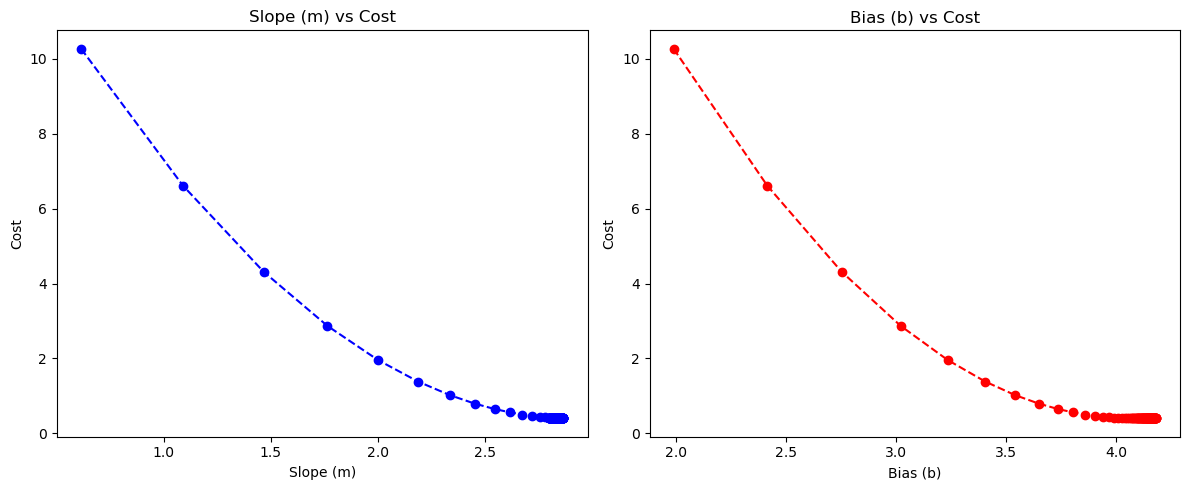

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic housing data (Price vs. Size)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # House size (in 1000 sq ft)
y = 4 + 3 * X + np.random.randn(100, 1)  # Price (in $1000s) with some noise

# Function to calculate the cost (mean squared error)
def compute_cost(X, y, m, b):
    m = m.reshape(-1, 1)
    b = b.reshape(-1, 1)
    predictions = m * X + b
    return np.mean((predictions - y) ** 2) / 2

# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = np.random.randn(1, 1)  # random initialization of slope
    b = np.random.randn(1, 1)  # random initialization of intercept
    m_hist, b_hist, cost_hist = [], [], []

    for _ in range(n_iterations):
        # Calculate gradients
        N = len(X)
        predictions = m * X + b
        m_gradient = -(2/N) * np.sum(X * (y - predictions))
        b_gradient = -(2/N) * np.sum(y - predictions)

        # Update m and b using gradients
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient

        # Compute cost and store for tracing
        cost = compute_cost(X, y, m, b)
        m_hist.append(m[0, 0])
        b_hist.append(b[0, 0])
        cost_hist.append(cost)

    return m, b, m_hist, b_hist, cost_hist

# Run gradient descent
m_final, b_final, m_hist, b_hist, cost_hist = gradient_descent(X, y, learning_rate=0.05, n_iterations=100)

# Plot the trace of slope (m) vs. cost and bias (b) vs. cost
def plot_trace(m_hist, b_hist, cost_hist):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(m_hist, cost_hist, color="blue", marker="o", linestyle="dashed")
    ax[0].set_xlabel("Slope (m)")
    ax[0].set_ylabel("Cost")
    ax[0].set_title("Slope (m) vs Cost")

    ax[1].plot(b_hist, cost_hist, color="red", marker="o", linestyle="dashed")
    ax[1].set_xlabel("Bias (b)")
    ax[1].set_ylabel("Cost")
    ax[1].set_title("Bias (b) vs Cost")

    plt.tight_layout()
    plt.show()

# Show the plots
plot_trace(m_hist, b_hist, cost_hist)


The Sum of Squares Explained (SSE) also referred to as the Sum of Squares Regression (SSR)is a measure of the variability in the outcome variable that is explained by the explanatory variables in your regression.
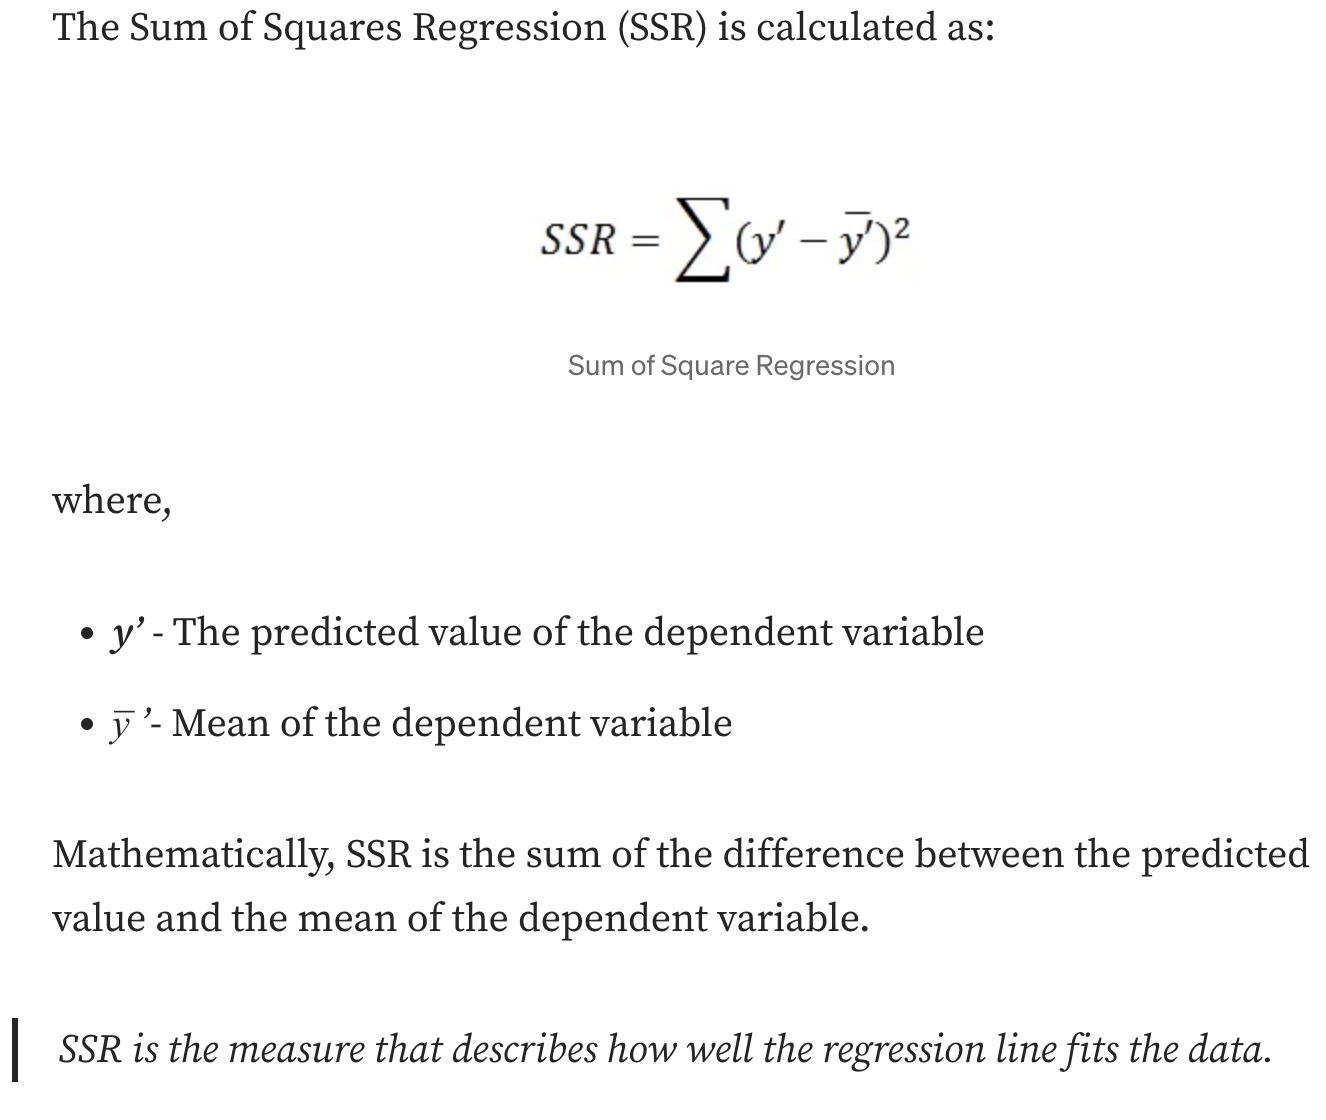

Residual or Unexplained Variability
The Residual Sum of Squares Residual (RSS) also referred to as the Sum of Squares Error (SSE) is a measure of the variability in the outcome variable that is not explained by your regression.

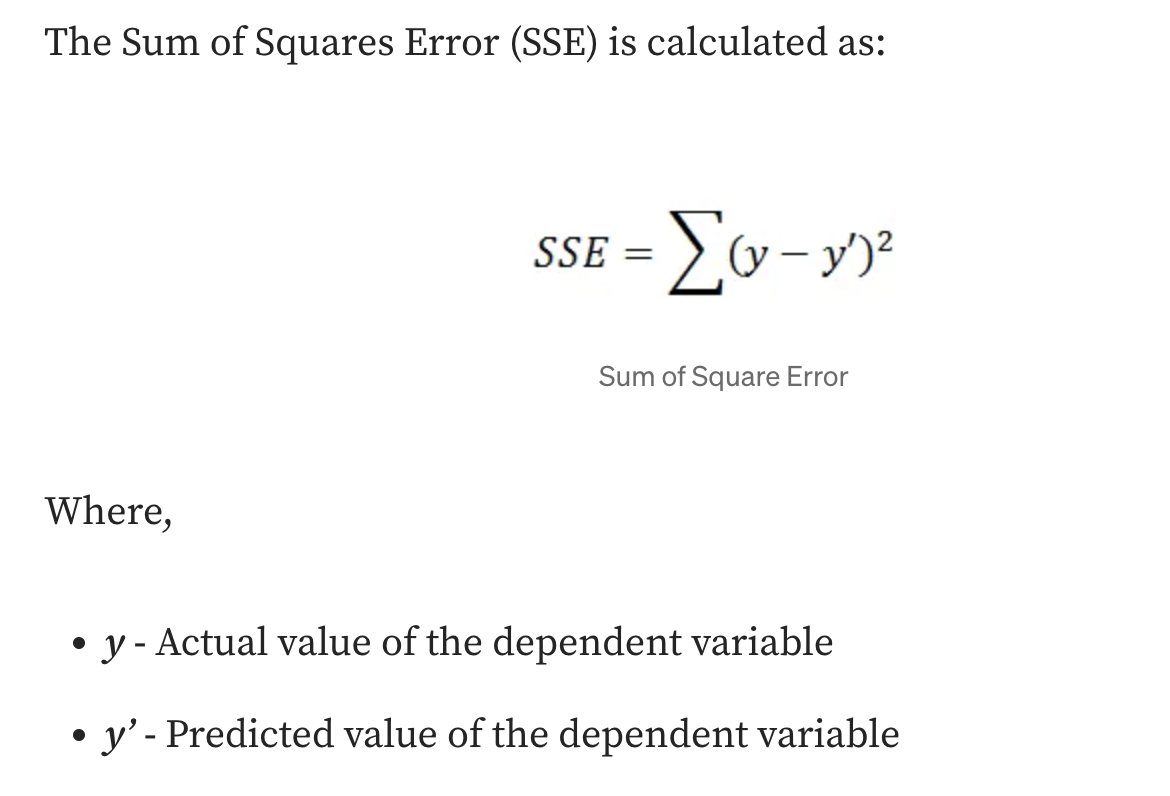

The Sum of Squares Total (SST) also referred to as the Total Sum of
Squares (TSS) is the measure of the total variability of the dataset. It is the dispersion of observed variables around the mean

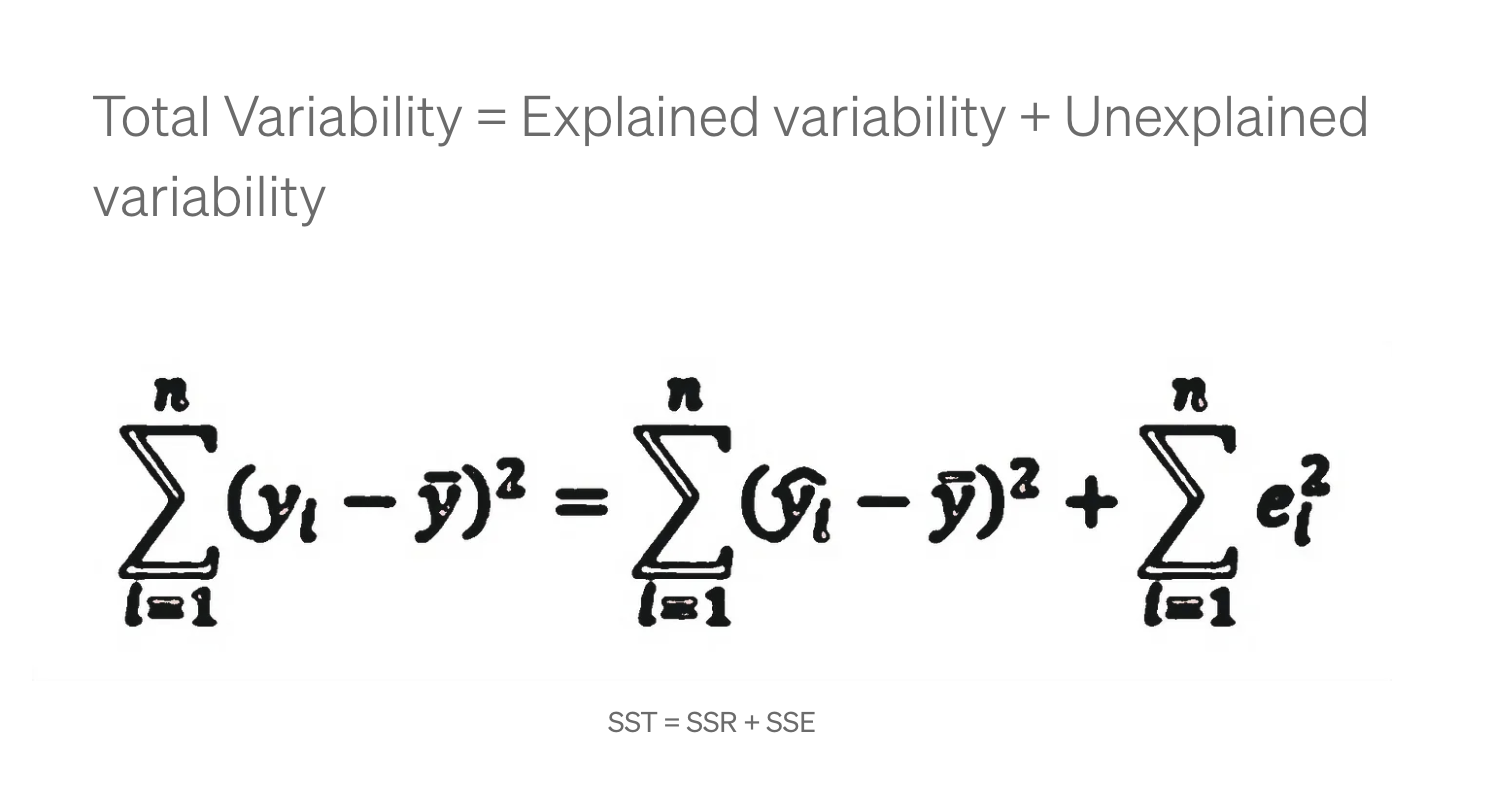

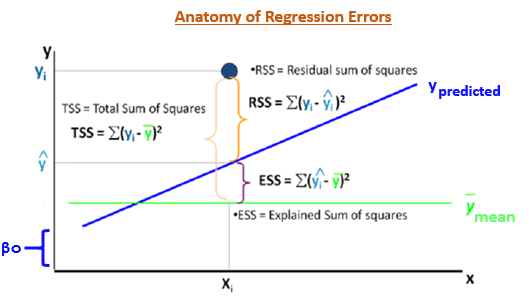

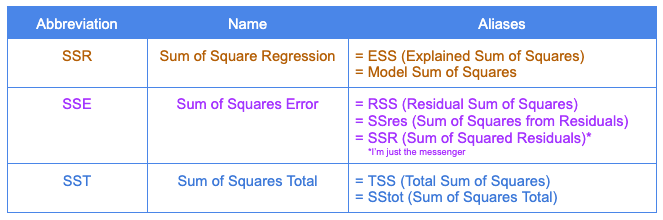

Coefficient of Determination
The Coefficient of Determination, sometimes referred to as the R-Squared, 
is a measure of what percentage of the variability in your outcome variable is explained by your explanatory variables.

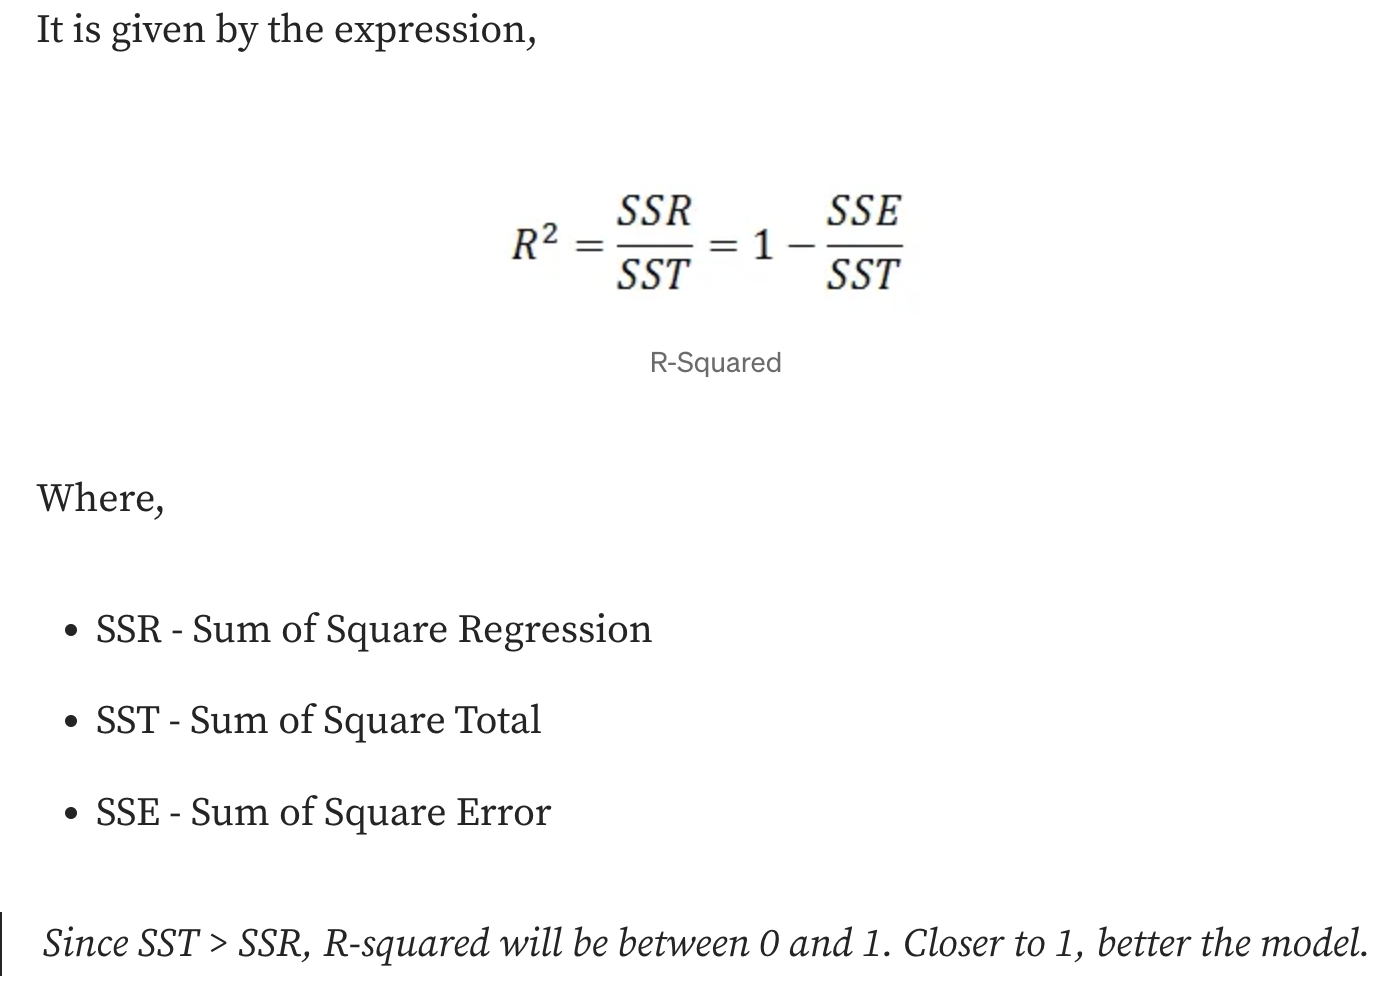

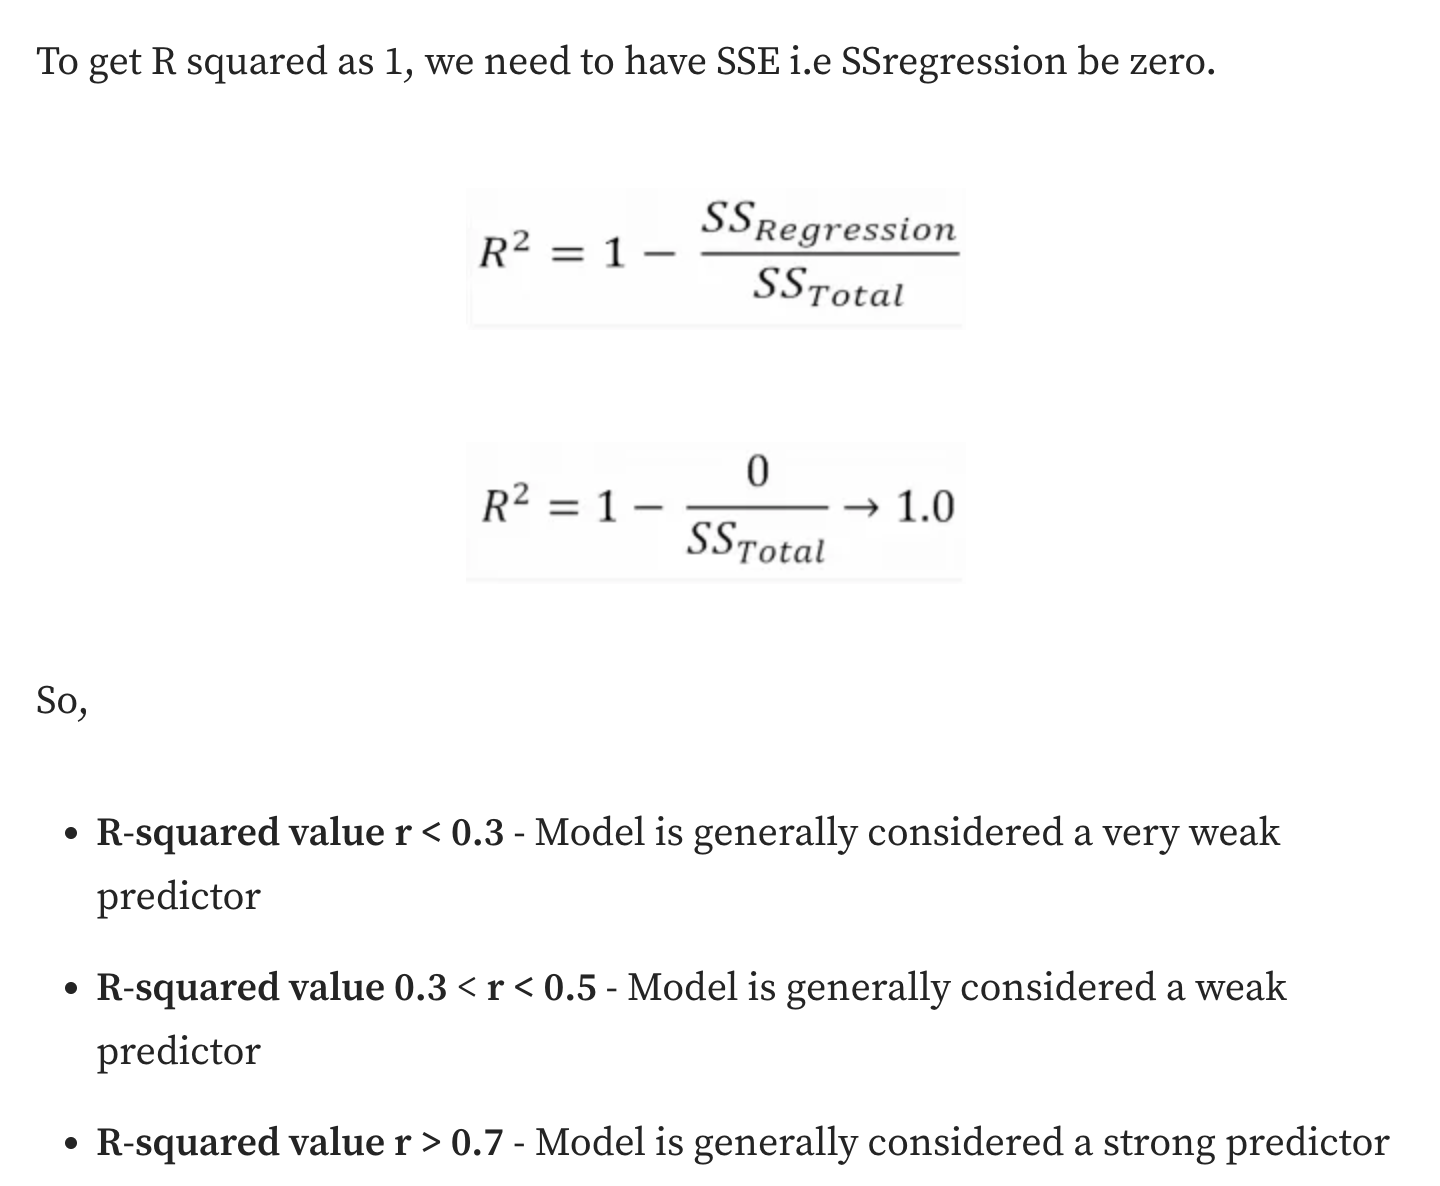

Can R-squared be negative?

For practical purposes, the lowest R squared you can get is zero, but only because the assumption is that if your regression line is better than using the mean.

However if your regression line is worse than using the mean value, the r squared value that you calculate will be negative.

An R-squared of 1 means you have no error in your regression.
An R-squared of 0 means your regression is no better than taking the mean value, i.e. you are not
using any information from the other variables
An R-squared of -1 means you are doing worse than the mean value

In [ ]:
Drawbacks of R-squared :

The R-squared value will increase as you put additional explanatory variables into the regression, 
regardless of whether the additional explanatory variables are meaningful for the outcome variable.

So to penalizes excessive use of variables, a new measure called Adjusted R-Squared is introduced.

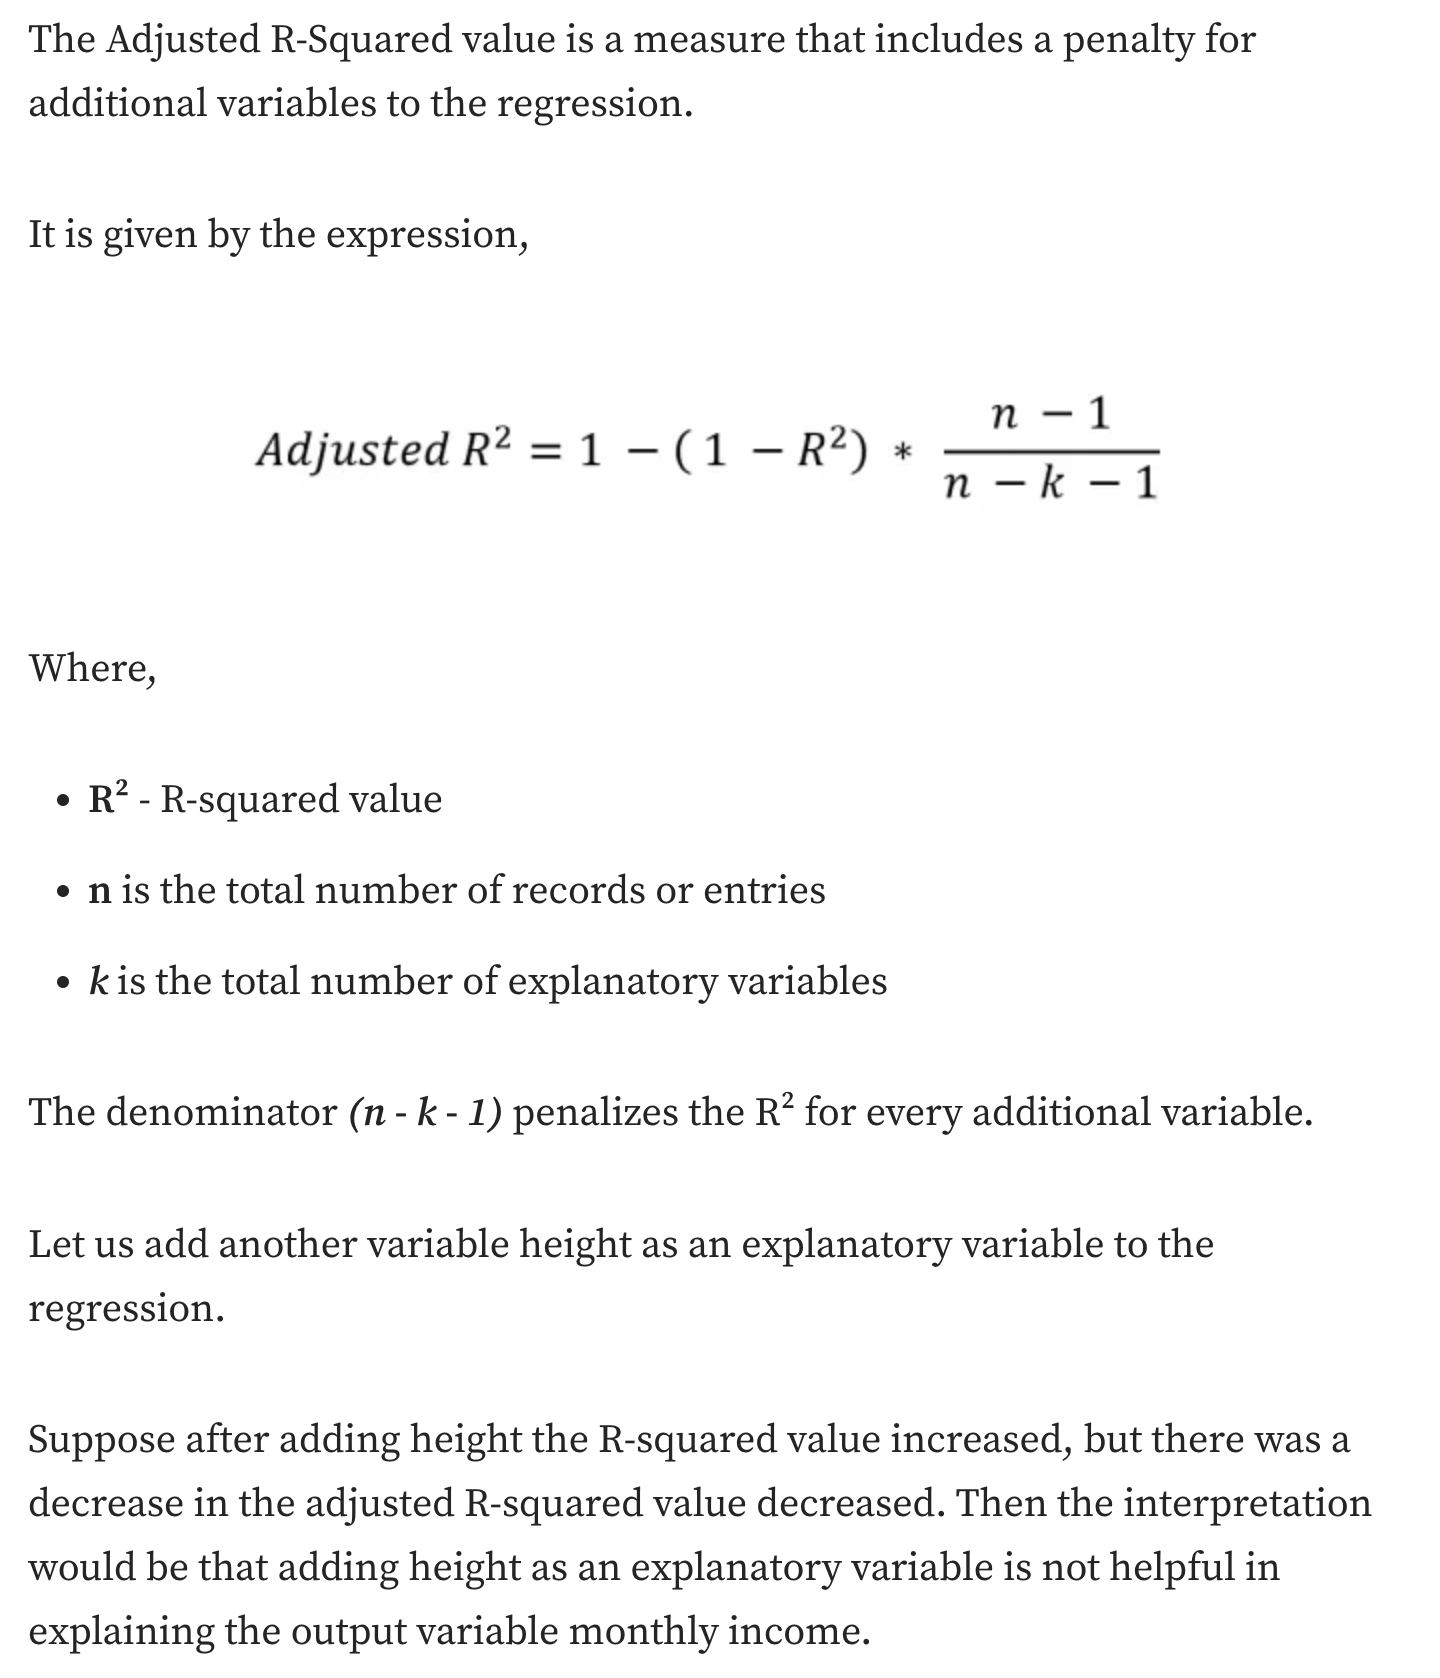

In [ ]:
# Feature selections:



1. Filter Methods
Correlation Matrix with Heatmap:
Use a correlation matrix to identify features that are highly correlated with the target variable and uncorrelated with each other.
Variance Threshold:
Remove features with low variance, as they may not carry useful information.
Mutual Information:
Measures the mutual dependence between two variables, useful for identifying non-linear relationships.
Chi-Square Test:
Used mainly for categorical features, this test measures the dependence between features and the target variable.
2. Wrapper Methods
Recursive Feature Elimination (RFE):
Recursively removes the least important feature and builds the model with the remaining features. The process continues until the optimal number of features is selected.
Sequential Feature Selection:
This includes Sequential Forward Selection (SFS) and Sequential Backward Selection (SBS). SFS starts with no features and adds one at a time, while SBS starts with all features and removes them one at a time, both optimizing model performance at each step.
3. Embedded Methods
Lasso (L1 Regularization):
Adds a penalty equivalent to the absolute value of the magnitude of coefficients, effectively shrinking some coefficients to zero, thus performing feature selection.
Ridge (L2 Regularization):
Adds a penalty equivalent to the square of the magnitude of coefficients, though it doesn't shrink coefficients to zero, it can still be used in combination with other techniques.
Elastic Net:
A combination of Lasso and Ridge that balances both penalties and can be used for feature selection.
Tree-Based Feature Selection:
Algorithms like Random Forest, XGBoost, and Gradient Boosting Trees provide feature importance scores, which can be used to select features.
4. Hybrid Methods
Combination of Filter and Wrapper Methods:
For example, you might first use a filter method to eliminate irrelevant features and then apply a wrapper method to find the optimal subset.
5. Model-Based Feature Selection
Using Feature Importance from Models:
Models like Random Forest, Gradient Boosting Machines (GBM), and XGBoost provide importance scores for features, which can be used to select the most important features.
Using Coefficients in Linear Models:
In linear models (like Logistic Regression or Linear Regression), the magnitude of the coefficients can indicate the importance of features.
6. Dimensionality Reduction Techniques
Principal Component Analysis (PCA):
Transforms the features into a new set of uncorrelated variables (principal components) ordered by the amount of variance they explain.
Linear Discriminant Analysis (LDA):
Reduces the dimensionality while preserving the information that discriminates between classes.
7. Manual/Domain Knowledge-Based Selection
Expert Knowledge:
Sometimes domain knowledge can be crucial in selecting features. Certain features may be known to be more relevant based on prior experience or research.
Redundant Feature Removal:
Manually removing features that are highly correlated with each other, keeping only one of them.
8. Statistical Methods
ANOVA F-test:
Used in the context of linear models to select features that contribute the most to the target variable.
T-test/Chi-square Test:
Used to assess the significance of individual features.
9. Unsupervised Feature Selection
Clustering-based Techniques:
Features can be clustered based on similarity, and representative features can be selected from each cluster.
Autoencoders:
Neural network-based techniques that can be used for feature extraction and dimensionality reduction.
10. Cross-Validation and Hyperparameter Tuning
Cross-Validation:
Using cross-validation in combination with feature selection techniques to ensure that the selected features generalize well to unseen data.
Grid Search with Feature Selection:
Simultaneously tuning hyperparameters and selecting the best set of features using cross-validation.